# Titanic Survival Prediction project

Welcome to the Titanic survival prediction project! The dataset is sourced from the historic Titanic event, containing information about individual passengers. Among the key attributes are age, gender, ticket class, fare, cabin, and, most importantly, whether they survived or not.

Through Exploratory Data Analysis (EDA), we embark on a journey to understand the intricacies of this dataset. EDA involves techniques that allow us to uncover patterns, relationships, and insights within the data. By delving into these details, we aim to gain valuable perspectives that will guide us in constructing a predictive model to determine a passenger's likelihood of survival. Let's set sail into this intriguing analysis!

In [1]:
# Importing libraries
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Read the dataset 
df = pd.read_csv('C:/Users/yomna/codsoft/TitanicProject/Dataset/TitanicDataset.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [3]:
# Understanding the dataset through looking at the dataset's shape, datatypes, nulls, Summary Statistics and more
df.shape 

(418, 12)

In [4]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [5]:
df.info() # Checking each column's datatype

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [6]:
# Finding Duplicates in the dataframe
duplicates = df[df.duplicated()]
print(duplicates) # Returns an empty dataframe, no duplicates are found

Empty DataFrame
Columns: [PassengerId, Survived, Pclass, Name, Sex, Age, SibSp, Parch, Ticket, Fare, Cabin, Embarked]
Index: []


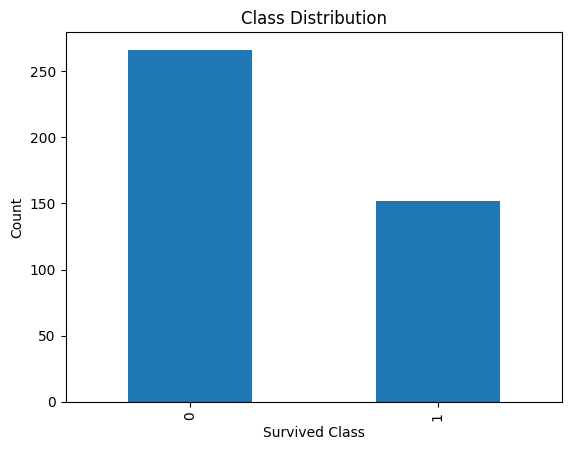

In [7]:
# Checking the distribution of classes in the target column to see if the data is unbalaced
distribution = df['Survived'].value_counts()

# Visualizing the class balance
distribution.plot(kind='bar')
plt.xlabel('Survived Class')
plt.ylabel('Count')
plt.title('Class Distribution')
plt.show()

In [8]:
null_num = df.isna().sum() # Finding the sum of null values per column
print(null_num)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


## Problems with the dataframe:

while exploring the dataframe, we found the following issues:
- missing values in three columns (Age, Fare, and Cabin)
- unbalanced data where the class '0' (indicating that the passenger unfortunately hadn't survived) is significantly larger than class '1'

Missing values: 

1. Age - 86 missing values 
2. Fare - 1 missing value 
3. Cabin - 327 missing values

in order to properly perform the analysis on the data frame,  we must clean the data from any missing values. here's how we'll do so for each column and why:

Age - find the median for the column and replace missing values with it.

Fare - drop the row since it's only one row.

Cabin - drop the column since it's irrelevant to the goal of our analysis.

the column 'Cabin' could have been useful to predict which passengers survived if we had data that explained to us where each cabin was located on the Titanic itself and which parts of the Titanic sank first. in that case, we could use this column to figure out where the passengers were on the Titanic, which would aid in the prediction.

however, that is not the case so this column is rendered useless for the prediction as well as it contains 78% missing values. Therefore, it must be dropped. 

Unbalaced dataset: 

A dataset is considered unbalanced when the distribution of classes (in the target variable) is significantly skewed towards one class, making it more challenging for machine learning models to learn patterns and make accurate predictions.

in our case, the target variable "Survived" (indicating whether a passenger survived or not) is skewed because majority of passengers did not survive. the dataset is considered unbalanced. to sovle this problem, we will preform undersampling.

In [9]:
# Cleaning the dataframe from all the missing values

# Finding the median age
median_age = df['Age'].median()
# Replacing null values in 'Age' column with the median
df['Age'].fillna(median_age, inplace=True)

# Finding the one row where Fare is equal to null
null_fare = df[df['Fare'].isnull()]
# Dropping the row
df.drop(null_fare.index, inplace=True)

# Droping the column Cabin
df.drop('Cabin', axis=1, inplace=True)

# Checking if there's still null values in the dataframe
null_num = df.isna().sum()
print(null_num)

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


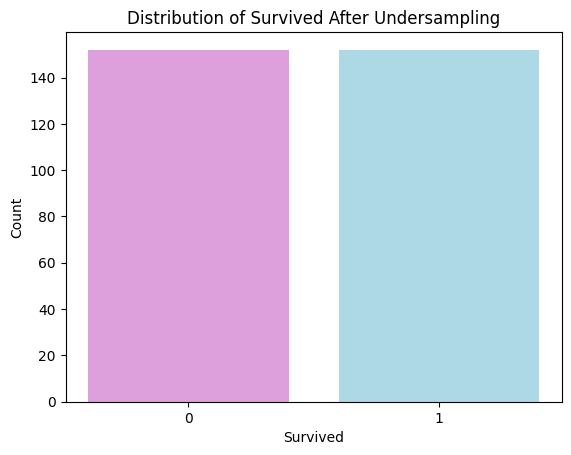

In [10]:
# Undersampling to balance out our target column 'Survived'
from imblearn.under_sampling import RandomUnderSampler

# Splitting the dataframe into X being the Features and y which is the target variable
X = df.drop(['Survived'], axis=1)
y = df['Survived']

rus = RandomUnderSampler(random_state=0)
X_resampled, y_resampled = rus.fit_resample(X, y)

# Visualizing the class balance after Undersampling
plt.bar(y_resampled.unique(), y_resampled.value_counts(), color=['plum', 'lightblue'])
plt.xticks(y_resampled.unique())
plt.xlabel('Survived')
plt.ylabel('Count')
plt.title('Distribution of Survived After Undersampling')
plt.show()

# Saving the balanced dataframe
df_balanced = pd.concat([X_resampled, y_resampled], axis=1)
df_balanced.to_csv('C:/Users/yomna/codsoft/TitanicProject/Dataset/Titanic_balanced_data.csv', index=False)
# Working with the balaced dataset moving forward
df = pd.read_csv('C:/Users/yomna/codsoft/TitanicProject/Dataset/Titanic_balanced_data.csv')


# Forming Hypotheses

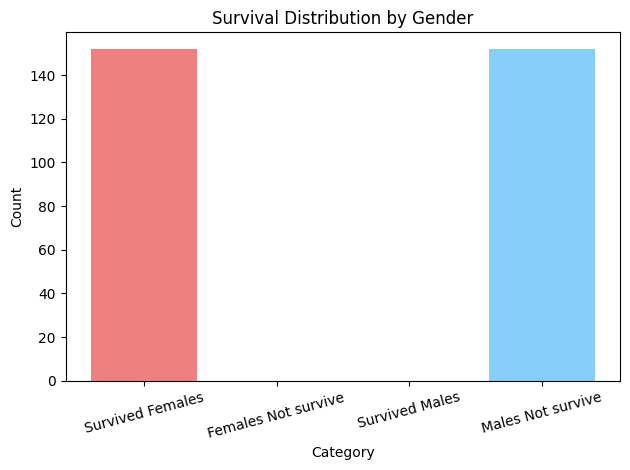

In [11]:
# Hypothesis one: one gender is more likely to survive
survived_females = ((df['Survived'] == 1) & (df['Sex'] == 'female')).value_counts().get(True, 0)
non_surviving_females = ((df['Survived'] == 0) & (df['Sex'] == 'female')).value_counts().get(True, 0)

survived_males = ((df['Survived'] == 1) & (df['Sex'] == 'male')).value_counts().get(True, 0)
non_surviving_males = ((df['Survived'] == 0) & (df['Sex'] == 'male')).value_counts().get(True, 0)

# Creating numbers, labels and title for the bar
labels = ['Survived Females', 'Females Not survive', 'Survived Males','Males Not survive']
numbers = [survived_females, non_surviving_females, survived_males, non_surviving_males]
colors = ['lightcoral', 'lightblue', 'orange', 'lightskyblue']

# Visualizing the columns
plt.bar(labels, numbers, color=colors)
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Survival Distribution by Gender')
plt.xticks(rotation=15)  # Rotating x-axis labels for better visibility
plt.tight_layout()  # Automatically adjust subplot parameters to fit the figure area
plt.show()

#in conclusion, females in the ship were more likely to survive due to the fact that all the survivors were females while non of the males survived 

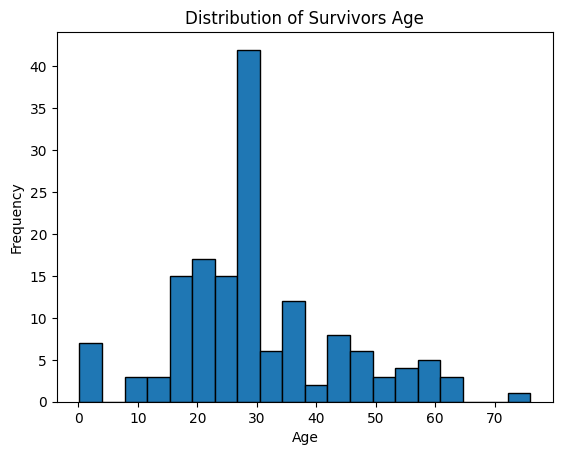

In [12]:
# Hypothesis two: there's an avaerage age for survivors
# Filtering Data
filtered_df = df[df['Survived'] == 1]

# Creating a histogram
plt.hist(filtered_df['Age'], bins=20, edgecolor='k')

# Add labels and title
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Survivors Age')

# Show the plot
plt.show()

#in conclusion, Most survivors are young adults between the ages of 25 and 30

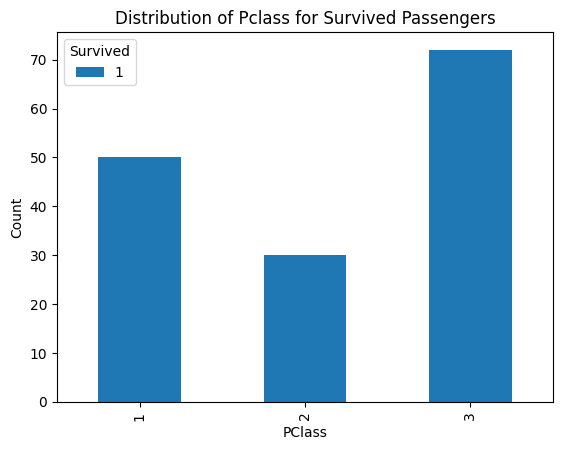

In [13]:
# Hypothesis three: most survivors are from one class
# Filtering Data
filtered_df = df[df['Survived'] == 1]

# Creating a crosstab between 'Pclass' and 'Survived'
cross_table = pd.crosstab(filtered_df['Pclass'], filtered_df['Survived'])
# Plotting a grouped bar chart
cross_table.plot(kind='bar', stacked=False)
# Adding labels and title
plt.xlabel('PClass')
plt.ylabel('Count')
plt.title('Distribution of Pclass for Survived Passengers')
# Showing the plot
plt.show()

#in conclusion, Most survivors have bought a third class ticket, making them from the third class

### 

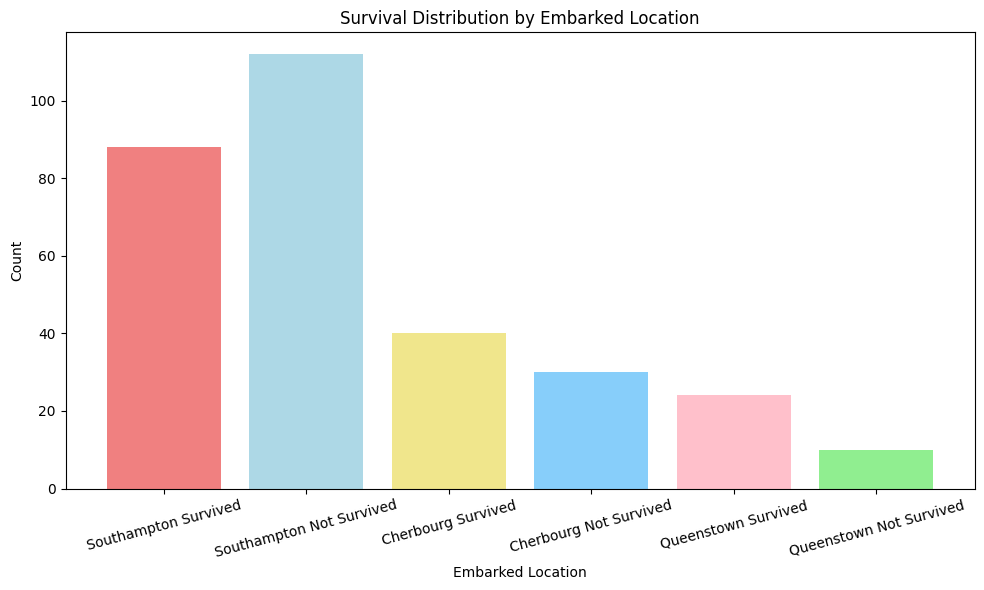

In [14]:
# Hypothesis four: the location where the passengers had embarked has an effect has the likelihood of surviving

Southampton_survived = len(df[(df['Embarked'] == 'S') & (df['Survived'] == 1)])
Southampton_not_survived = len(df[(df['Embarked'] == 'S') & (df['Survived'] == 0)])

Cherbourg_survived = len(df[(df['Embarked'] == 'C') & (df['Survived'] == 1)])
Cherbourg_not_survived = len(df[(df['Embarked'] == 'C') & (df['Survived'] == 0)])

Queenstown_survived = len(df[(df['Embarked'] == 'Q') & (df['Survived'] == 1)])
Queenstown_not_survived = len(df[(df['Embarked'] == 'Q') & (df['Survived'] == 0)])

# Create a bar chart
labels = ['Southampton Survived', 'Southampton Not Survived', 'Cherbourg Survived', 'Cherbourg Not Survived', 'Queenstown Survived', 'Queenstown Not Survived']
values = [Southampton_survived, Southampton_not_survived, Cherbourg_survived, Cherbourg_not_survived, Queenstown_survived, Queenstown_not_survived]
colors = ['lightcoral', 'lightblue', 'khaki', 'lightskyblue', 'pink', 'lightgreen']

plt.figure(figsize=(10, 6))  # Set the size of the figure
plt.bar(labels, values, color=colors)
plt.xlabel('Embarked Location')
plt.ylabel('Count')
plt.title('Survival Distribution by Embarked Location')
plt.xticks(rotation=15)  # Rotating x-axis labels for better visibility
plt.tight_layout()  # Automatically adjust subplot parameters to fit the figure area
plt.show()

#in conclusion, Most survivors have embarked on the ship from Southampton

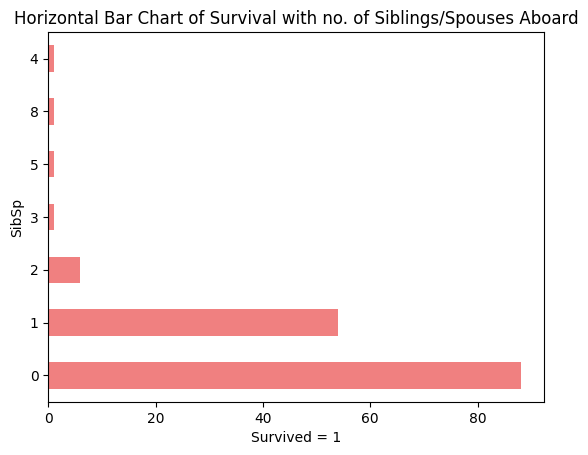

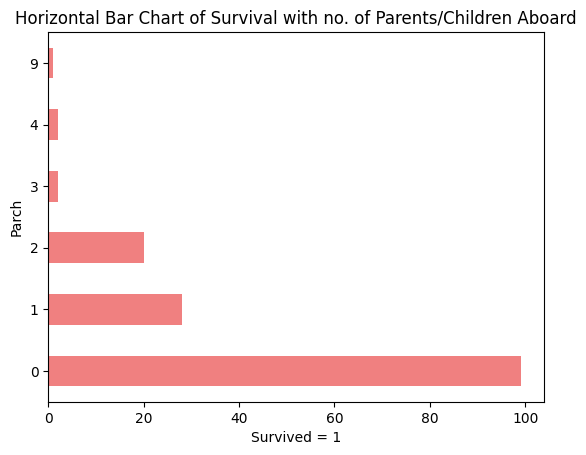

In [15]:
# Passengers with more people with them (spouse, siblings, children or parents) have affected their likelihood of survival 
SibSp = filtered_df['SibSp'].value_counts()
Parch = filtered_df['Parch'].value_counts()

# Creating a horizontal bar chart for SibSp
SibSp.plot(kind='barh', color='lightcoral')
# Adding labels and title
plt.ylabel('SibSp')
plt.xlabel('Survived = 1')
plt.title('Horizontal Bar Chart of Survival with no. of Siblings/Spouses Aboard')
# Showing the plot
plt.show()

# Create a horizontal bar chart for Parch
Parch.plot(kind='barh', color='lightcoral')
# Adding labels and title
plt.ylabel('Parch')
plt.xlabel('Survived = 1')
plt.title('Horizontal Bar Chart of Survival with no. of Parents/Children Aboard')
# Showing the plot
plt.show()

#in conclusion, passengers that had less people with them (spouse, siblings, children or parents) were more likely to survive 

## In conclusion, the analysis reveals several key findings:

1. Females were notably more likely to survive the tragedy, as all the survivors were females, while none of the male passengers survived.

2. The majority of survivors were young adults, with ages ranging between 25 and 30 years old.

3. Most survivors held third-class tickets, indicating their belonging to the third-class passenger group.

4. A significant portion of survivors embarked on the ship from Southampton, suggesting a potential correlation between embarkation location and survival rates.

5. Passengers with fewer companions (spouse, siblings, children, or parents) were more likely to secure their survival during the tragic event. This indicates that individuals with fewer dependents may have had an advantage in navigating the crisis.